# Notebook Import

In [124]:
from os import walk #this help to walk to our file path
from os.path import join # this help to join the file path 

import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer #this help to remove the punchtiotion
from nltk.stem import SnowballStemmer #this help to remove the punchtiotion
from nltk.corpus import stopwords #this help to cllect the data like a,an,the and so on
from nltk.tokenize import word_tokenize # word tokenize help to store the sentences in comma and seperate

import pandas as pd

from bs4 import BeautifulSoup # this help to clear the html tags and make it more clear text 

from wordcloud import WordCloud

from PIL import Image

import numpy as np

from sklearn.model_selection import train_test_split

%matplotlib inline

# Constants

In [177]:
path_root = 'C:/Users/97798/OneDrive/Desktop/Folder/M Learning/06 pre-process text data/SpamData/01_Processing/'

path_root_text = 'C:/Users/97798/OneDrive/Desktop/Folder/M Learning/06 pre-process text data/SpamData/02_Training/'

EXAMPLE_FILE = path_root + 'practice_email.txt'

SPAM_1_PATH = path_root + 'spam_assassin_corpus/spam_1'
SPAM_2_PATH = path_root +'spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = path_root +'spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = path_root +'spam_assassin_corpus/easy_ham_2'

Data_Json_File = path_root +'email_text_data.json'

VOCAB_SIZE = 2500

WORD_ID_FILE = path_root + 'word_by_id.csv' # this is create the name of the file and save the data 

WHALE_FILE = path_root + 'wordcloud_resources/whale-icon.png'

SKULL_FILE = path_root + 'wordcloud_resources/skull-icon.png'

THUMBS_UP_FILE = path_root + 'wordcloud_resources/thumbs-up.png'

THUMBS_DOWN_FILE = path_root + 'wordcloud_resources/thumbs-down.png'

CUSTOM_FONT_FILE = path_root + 'wordcloud_resources/OpenSansCondensed-Bold.ttf'

# saving the text file

TRAINING_DATA_FILE = path_root_text + 'train_data.txt'
TEST_DATA_FILE = path_root_text + 'train_test_data.txt'


SPAM_CAT = 1
HAM_CAT = 0

# Reading Files

In [3]:
stream = open(EXAMPLE_FILE, encoding = 'latin-1')
message = stream.read()
stream.close()

In [4]:
print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [5]:
print(type(message))

<class 'str'>


In [6]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [7]:
stream = open(EXAMPLE_FILE,encoding='latin-1')
is_body = False
lines = []
for line in stream:
    if is_body is True :
        lines.append(line)
    elif line == '\n':
        is_body= True
stream.close()
email_body ='\n'.join(lines)
print(email_body)
# print(lines)




Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

# Generator Functions

In [8]:
def generator_squares(n):
    for my_number in range(n):
        yield my_number **2
    

In [9]:
for i in generator_squares(5):
    print(i,end = ' -> ')

0 -> 1 -> 4 -> 9 -> 16 -> 

## Email body extraction 

In [10]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root,file_name)
                    
            stream = open(filepath,encoding='latin-1')
            is_body = False
            
            lines = []
            
            for line in stream:
                
                if is_body is True :
                    
                    lines.append(line)
                    
                elif line == '\n':
                    
                    is_body= True
                    
            stream.close()

            email_body = '\n'.join(lines)
            
            yield file_name,email_body

In [11]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'CATEGORY': classification,'MESSAGE': email_body})
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)

In [12]:
spam_emails = df_from_directory(SPAM_1_PATH, SPAM_CAT)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, SPAM_CAT))
spam_emails.head()

,CATEGORY,MESSAGE
00001.7848dde101aa985090474a91ec93fcf0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
00002.d94f1b97e48ed3b553b3508d116e6a09,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724,1,##############################################...
00005.57696a39d7d84318ce497886896bf90d,1,I thought you might like these:\n\n1) Slim Dow...


In [13]:
spam_emails.shape

(1898, 2)

In [14]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))
ham_emails.head()

ham_emails.shape

(3901, 2)

In [15]:
data = pd.concat([spam_emails,ham_emails])
print('shape of entire dataFrame is ', data.shape)

shape of entire dataFrame is  (5799, 2)


In [16]:
data.head()

,CATEGORY,MESSAGE
00001.7848dde101aa985090474a91ec93fcf0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
00002.d94f1b97e48ed3b553b3508d116e6a09,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00003.2ee33bc6eacdb11f38d052c44819ba6c,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
00004.eac8de8d759b7e74154f142194282724,1,##############################################...
00005.57696a39d7d84318ce497886896bf90d,1,I thought you might like these:\n\n1) Slim Dow...


In [17]:
data.tail()

,CATEGORY,MESSAGE
01396.61983fbe6ec43f55fd44e30fce24ffa6,0,http://news.bbc.co.uk/1/hi/england/2515127.stm...
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,0,"> >-- be careful when using this one.) Also, t..."
01398.169b51731fe569f42169ae8f948ec676,0,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ..."
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,0,"So then, ""Mark Hammond"" <mhammond@skippinet.co..."
01400.f897f0931e461e7b2e964d28e927c35e,0,"Hi there,\n\n\n\nNow this is probably of no us..."


# Data Cleaing : Checking for Missing values

In [18]:
# Check if any message bodies are null
data['MESSAGE'].isnull().values.any()

False

In [19]:
type("")

str

In [20]:
len("")

0

In [21]:
my_var = None
type(my_var)

NoneType

In [22]:
# Check if there are empty emails(string length zero)
(data.MESSAGE.str.len()==0).any()

True

In [23]:
(data.MESSAGE.str.len()==0).sum()

3

In [24]:
# challenge : how would you check the number of entries with null/none values 

data.MESSAGE.isnull().sum()

0

## Locate emails 

In [25]:
type(data.MESSAGE.str.len()==0)

pandas.core.series.Series

In [26]:
data[data.MESSAGE.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [27]:
# data.index.get_loc('.DS_store')

In [28]:
# data[4608:4611]

# Remove system file entries from dataframe

In [29]:
data.drop(['cmds'],inplace=True)

In [30]:
data.shape

(5796, 2)

# Add Document IDs to Track Emails in Dataset

In [31]:
document_ids = range(0,len(data.index))
data['Doc_ID'] = document_ids


data['File_Name'] = data.index
data.set_index('Doc_ID', inplace=True)

In [32]:
data.head()

,CATEGORY,MESSAGE,File_Name
Doc_ID,,,
0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",00001.7848dde101aa985090474a91ec93fcf0
1,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,1,##############################################...,00004.eac8de8d759b7e74154f142194282724
4,1,I thought you might like these:\n\n1) Slim Dow...,00005.57696a39d7d84318ce497886896bf90d


In [33]:
data.tail()

,CATEGORY,MESSAGE,File_Name
Doc_ID,,,
5791,0,http://news.bbc.co.uk/1/hi/england/2515127.stm...,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,0,"> >-- be careful when using this one.) Also, t...",01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,0,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",01398.169b51731fe569f42169ae8f948ec676
5794,0,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5795,0,"Hi there,\n\n\n\nNow this is probably of no us...",01400.f897f0931e461e7b2e964d28e927c35e


# Saving a JSON file with pandas

In [34]:
data.to_json(Data_Json_File) 

# Number of spam messages visualised (pie charts)

In [35]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [36]:
amount_of_spam = data.CATEGORY.value_counts()[1]
amount_of_ham = data.CATEGORY.value_counts()[0]

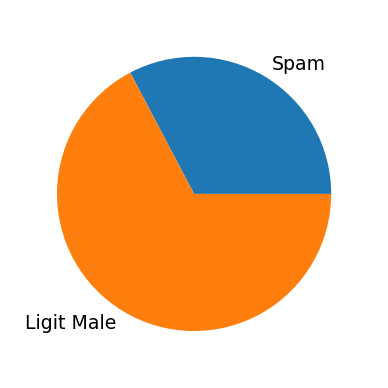

In [37]:
Category_name = ['Spam','Ligit Male']
size = [amount_of_spam,amount_of_ham]

plt.figure(figsize=[2,2],dpi=227)

plt.pie(size,labels=Category_name,textprops={'fontsize':6})

plt.show()

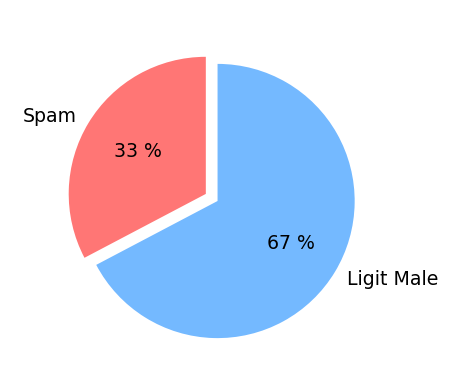

In [38]:
Category_name = ['Spam','Ligit Male']
size = [amount_of_spam,amount_of_ham]
custom_color = ['#ff7675','#74b9ff']

plt.figure(figsize=[2,2],dpi=227)

plt.pie(size,labels=Category_name,textprops={'fontsize':6},startangle=90,autopct='% 1.0f %%',colors=custom_color,
        explode=[0,0.1])

plt.show()

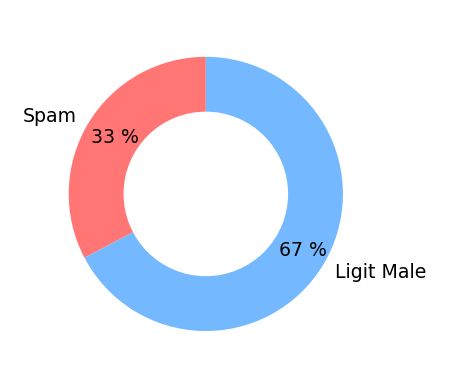

In [39]:
Category_name = ['Spam','Ligit Male']
size = [amount_of_spam,amount_of_ham]
custom_color = ['#ff7675','#74b9ff']

plt.figure(figsize=[2,2],dpi=227)

plt.pie(size,labels=Category_name,textprops={'fontsize':6},startangle=90,autopct='% 1.0f %%',colors=custom_color,
        pctdistance=0.8)

# Draw Circle
center_circle = plt.Circle((0,0),radius=0.6,fc='white')
plt.gca().add_artist(center_circle)

plt.show()

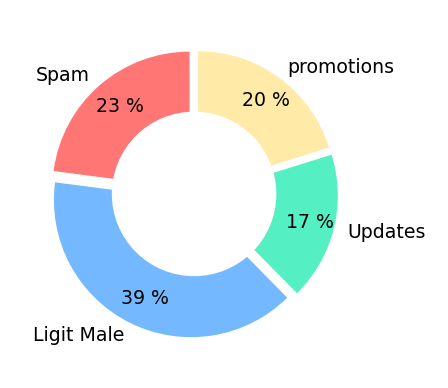

In [40]:
Category_name = ['Spam','Ligit Male','Updates','promotions']
size = [25,43,19,22]
custom_color = ['#ff7675','#74b9ff','#55efc4','#ffeaa7']
offset = [0.05,0.05,0.05,0.05]

plt.figure(figsize=[2,2],dpi=227)

plt.pie(size,labels=Category_name,textprops={'fontsize':6},startangle=90,autopct='% 1.0f %%',colors=custom_color,
        pctdistance=0.8,explode=offset)

# Draw Circle
center_circle = plt.Circle((0,0),radius=0.6,fc='white')
plt.gca().add_artist(center_circle)

plt.show()

# Natural language processing

## Text pre-processing

In [41]:
# Convert to lower case 
msg = 'All Work an no play mask tack a dull Boy'
msg.lower()

'all work an no play mask tack a dull boy'

## Download the NLTR Resources(Tokenizor and stop words)

In [42]:
nltk.download('punkt')
#C:\Users\97798\AppData\Roaming\nltk_data

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [43]:
nltk.download('stopwords')
# C:\Users\97798\AppData\Roaming\nltk_data

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [44]:
# this is a book and we are downloading this books into the folder for word cloud
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Error loading gutenberg: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading shakespeare: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

## Tokenising

In [45]:
msg = 'All Work an no play mask tack a dull Boy'
word_tokenize(msg.lower()) # word tokenize help to store the sentences in comma and seperate 

['all', 'work', 'an', 'no', 'play', 'mask', 'tack', 'a', 'dull', 'boy']

## Removing stop words 

In [46]:
stop_words = set(stopwords.words('english'))

In [47]:
type(stop_words)

set

In [48]:
# text = input('Enter alpha:')
# if text in stop_words :
#     print('Found It')
# else:
#     print(text + ' Not found')

In [49]:
msg = 'All Work an no play mask jack a dull Boy. To be or not to be.'
words = word_tokenize(msg.lower())

filtered_words = []

# challenge - append non stop word to filtered_words

for word in words:
    if word not in stop_words:
        filtered_words.append(word)
print(filtered_words)

['work', 'play', 'mask', 'jack', 'dull', 'boy', '.', '.']


## word strmming and stems 


In [50]:
msg = 'All Work an no play makes jack a dull Boy. To be or not to be. \
Nobody expect the spanish inqulsition'
words = word_tokenize(msg.lower())

# stemmer = PorterStemmer()
stemmer = SnowballStemmer('english') # this stemmer helps to remove the s, ing, es and es and many more

filtered_words = []

# challenge - append non stop word to filtered_words

for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', '.', '.', 'nobodi', 'expect', 'spanish', 'inqulsit']


# Removing Punctuation

In [51]:
'p'.isalpha() # this help to remove the punctuatuon word

True

In [52]:
'??'.isalpha()

False

In [53]:
msg = 'All Work an no play makes jack a dull Boy. To be or not to be.??? \
Nobody expect the spanish inqulsition'
words = word_tokenize(msg.lower())

# stemmer = PorterStemmer()
stemmer = SnowballStemmer('english') # this stemmer helps to remove the s, ing, es and es and many more

filtered_words = []

for word in words:
      # Removes the stop words and punctuation
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'expect', 'spanish', 'inqulsit']


## Removing HTML tags from Emails 

In [54]:
data.at[100,'MESSAGE']

'<html>\n\n<head>\n\n<title>Digital Publishing Tools - Free Software Alert!</title>\n\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">\n\n</head>\n\n<body bgcolor="#FFFFFF" text="#000000">\n\n<center>\n\n<table width="582" border="2" cellspacing="0" cellpadding="5" bordercolor="#0077CC">\n\n<tr>\n\n<td colspan="3" width="582" align="center" bgcolor="#0077CC"><!5122qHWL1-032pyeM4045IIgM3-001oYhw0942jQSK5-726UDqG9283lEHR8-145EiGhl64>\n\n<a href="http://3dpageturningebook.com" style="text-decoration:none;">\n\n<b><font face="Verdana, Arial, Helvetica, sans-serif" size="4" color="#FFFFFF">Publish Like a Professional with Digital Publishing Tools</font></b>\n\n</a>\n\n</td>\n\n</tr>\n\n\n\n<tr>\n\n<td colspan="1" width="204" valign="top">\n\n<b><font face="Verdana Arial, Helvetica, sans-serif" color="#000066" size="2">Easily Create Professional:</font></b>\n\n<font face="Verdana, Arial, Helvetica, sans-serif" size="1" color="#000066">\n\n<ul>\n\n<li>eBooks</li>\n\n<

In [55]:
soup = BeautifulSoup(data.at[100,'MESSAGE'], 'html.parser')
print(soup.prettify()) # this help to make our email more readable 

<html>
 <head>
  <title>
   Digital Publishing Tools - Free Software Alert!
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <center>
   <table border="2" bordercolor="#0077CC" cellpadding="5" cellspacing="0" width="582">
    <tr>
     <td align="center" bgcolor="#0077CC" colspan="3" width="582">
      <!--5122qHWL1-032pyeM4045IIgM3-001oYhw0942jQSK5-726UDqG9283lEHR8-145EiGhl64-->
      <a href="http://3dpageturningebook.com" style="text-decoration:none;">
       <b>
        <font color="#FFFFFF" face="Verdana, Arial, Helvetica, sans-serif" size="4">
         Publish Like a Professional with Digital Publishing Tools
        </font>
       </b>
      </a>
     </td>
    </tr>
    <tr>
     <td colspan="1" valign="top" width="204">
      <b>
       <font color="#000066" face="Verdana Arial, Helvetica, sans-serif" size="2">
        Easily Create Professional:
       </font>
      </b>
      <font color="#0

In [56]:
soup.get_text()

'\n\nDigital Publishing Tools - Free Software Alert!\n\n\n\n\n\n\n\n\nPublish Like a Professional with Digital Publishing Tools\n\n\n\n\n\nEasily Create Professional:\n\n\neBooks\neBrochures\neCatalogs\nResumes\nNewsletters\nPresentations\nMagazines\nPhoto Albums\nInvitations\nMuch, much more\n\n\n\n\nSave MONEY! - Save Trees\n\n\n\n\nSave on Printing, Postage and Advertising Costs\n\n\n\nDIGITAL PUBLISHING TOOLS\n\n\nDOWNLOAD NEW FREE Version NOW!\n\n\n*Limited Time Offer\n\n\nChoose from these\n\nDisplay Styles:\n\n\n3D Page Turn\nSlide Show\nSweep/Wipe\n\n\nEmbed hyperlinks and Link to anywhere Online, \n\n\n\nsuch as your Website, Order Page or Contact Form.\n\n\n\n\nDistribute via Floppy, CD-ROM, E-Mail or Online.\n\n\n\n\n\n\n\nTake your Marketing to the Next Level!\n\n\n\n\n\n\nFor More Info, Samples or a FREE Download, click the appropriate link to the right! \xa0\n\nServer demand is extremely high for this limited time Free Software offer. \xa0\n\nPlease try these links period

## Functions for Email processing

In [57]:
def clean_message(message, stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    
    # Converts to Lower Case and splits up the words
    words = word_tokenize(message.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [58]:
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [59]:
# Challenge: Modify function to remove HTML tags. Then test on Email with DOC_ID 2. 
def clean_msg_no_html(message, stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    
    # Remove HTML tags
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    # Converts to Lower Case and splits up the words
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
#             filtered_words.append(word) 
    
    return filtered_words

In [60]:
clean_msg_no_html(data.at[1,'MESSAGE'])

['fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'child',
 'support',
 'deserv',
 'free',
 'legal',
 'advic',
 'http',
 'join',
 'web',
 'fastest',
 'grow',
 'singl',
 'commun',
 'http',
 'start',
 'privat',
 'photo',
 'album',
 'onlin',
 'http',
 'wonder',
 'day',
 'offer',
 'manag',
 'prizemama',
 'wish',
 'leav',
 'list',
 'pleas',
 'use',
 'link',
 'http',
 'ilug',
 'irish',
 'linux',
 'user',
 'group',
 'ilug',
 'http',
 'un',
 'subscript',
 'inform',
 'list',
 'maintain',
 'listmast']

# Apply Cleaning and Tokenisation to all messages

### slicing DataFrames and series and creating subsets 

In [61]:
data.iat[2,2] # mark_id = 2 and file_name = 2

'00003.2ee33bc6eacdb11f38d052c44819ba6c'

In [62]:
data.iloc[5:11] # this will select the rows from 0 to 2

,CATEGORY,MESSAGE,File_Name
Doc_ID,,,
5,1,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,00006.5ab5620d3d7c6c0db76234556a16f6c1
6,1,Help wanted. We are a 14 year old fortune 500...,00007.d8521faf753ff9ee989122f6816f87d7
7,1,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,00008.dfd941deb10f5eed78b1594b131c9266
8,1,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
9,1,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",00010.445affef4c70feec58f9198cfbc22997
10,1,Cellular Phone Accessories All At Below Wholes...,00011.61816b9ad167657773a427d890d0468e


In [63]:
# data.MESSAGE.iloc[0:3]

In [64]:
first_emails = data.MESSAGE.iloc[0:3]

nested_list = first_emails.apply(clean_message)

In [65]:
flat_list = []
for sublist in nested_list:
    for item in sublist:
        flat_list.append(item)

# flat_list = [item for sublist in nested_list for item in sublist]
        
len(flat_list)

321

In [66]:
flat_list

['doctyp',
 'html',
 'public',
 'html',
 'html',
 'head',
 'meta',
 'ype',
 'meta',
 'mshtml',
 'bodi',
 'insert',
 'calypso',
 'tabl',
 'color',
 'black',
 'display',
 'none',
 'tbodi',
 'tr',
 'td',
 'hr',
 'noshad',
 'tr',
 'td',
 'hr',
 'noshad',
 'end',
 'calypso',
 'insert',
 'font',
 'arial',
 'helvetica',
 'br',
 'end',
 'calypso',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'save',
 'life',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'spend',
 'center',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'life',
 'quot',
 'save',
 'center',
 'p',
 'p',
 'br',
 'p',
 'center',
 'tabl',
 'tbodi',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'b',
 'font',
 'g',
 'famili',
 'financi',
 'secur',
 'import',
 'life',
 'quot',
 'save',
 'ke',
 'buy',
 'life',
 'insur',
 'simpl',
 'afford',
 'provid',
 'free',
 'access',
 'best',
 'compani',
 'lowest',
 'tr',
 'td',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'font',
 'b',
 'life',
 'quot',
 'save',
 'fast',
 'save',
 'money',
 'let',

In [67]:
%%time

# use apply() on all the messages in the dataframe
nested_list = data.MESSAGE.apply(clean_msg_no_html)

C:\Users\97798\anaconda3\lib\site-packages\bs4\__init__.py:414: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


Wall time: 46.2 s


In [68]:
nested_list.tail()

Doc_ID
5791    [http, bizarr, collect, stuf, anim, could, fet...
5792    [care, use, one, also, realli, cute, thing, ja...
5793    [sm, skip, montanaro, write, jeremi, put, anot...
5794    [mark, hammond, like, given, zodb, sound, attr...
5795    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, dtype: object

### Using Logic to slice DataFrame

In [69]:
data[data.CATEGORY == 1].shape

(1896, 3)

In [70]:
data[data.CATEGORY == 1].tail()

,CATEGORY,MESSAGE,File_Name
Doc_ID,,,
1891,1,"<html>\n\n<head>\n\n<meta http-equiv=""content-...",01396.e80a10644810bc2ae3c1b58c5fd38dfa
1892,1,This is a multi-part message in MIME format.\n...,01397.f75f0dd0dd923faefa3e9cc5ecb8c906
1893,1,"Dear Subscriber,\n\n\n\nIf I could show you a ...",01398.8ca7045aae4184d56e8509dc5ad6d979
1894,1,****Mid-Summer Customer Appreciation SALE!****...,01399.2319643317e2c5193d574e40a71809c2
1895,1,ATTN:SIR/MADAN \n\n\n\n ...,01400.b444b69845db2fa0a4693ca04e6ac5c5


In [71]:
# Challenge - create two variables (doc_ids_spam, doc_ids_ham) which hold onto the indices for
# the spam and the non spam emails respectively
doc_ids_spam = data[data.CATEGORY == 1].index
doc_ids_ham = data[data.CATEGORY == 0].index


### Subsetting a series with an Index

In [72]:
type(doc_ids_ham)

pandas.core.indexes.numeric.Int64Index

In [73]:
type(nested_list)

pandas.core.series.Series

In [74]:
nested_list_spam = nested_list.loc[doc_ids_spam]

In [75]:
nested_list_spam.tail()

Doc_ID
1891    [want, boss, train, home, studi, thousand, peo...
1892    [messag, mime, format, prefer, doctor, order, ...
1893    [dear, subscrib, could, show, way, get, visito...
1894    [custom, appreci, sale, express, appreci, loya...
1895    [attn, strictli, confidenti, pleas, introduc, ...
Name: MESSAGE, dtype: object

In [76]:
nested_list_ham = nested_list.loc[doc_ids_ham]

In [77]:
nested_list_ham.head()

Doc_ID
1896    [date, wed, aug, chri, garrigu, ca, reproduc, ...
1897    [martin, post, tasso, papadopoulo, greek, scul...
1898    [man, threaten, explos, moscow, thursday, augu...
1899    [klez, viru, wo, die, alreadi, prolif, viru, e...
1900    [ad, cream, spaghetti, carbonara, effect, past...
Name: MESSAGE, dtype: object

In [78]:
flat_list_ham = []
for sublist in nested_list_ham:
    for item in sublist:
        flat_list_ham.append(item)
                
normal_words = pd.Series(flat_list_ham).value_counts() #this value_counts help to remove the reapted word 


normal_words.shape[0] # total number of unique words in the non-spam messages

20815

In [79]:
normal_words[:10]

http      7563
use       3633
list      2880
one       2373
get       2286
mail      2255
would     2003
like      1931
messag    1849
work      1800
dtype: int64

In [80]:
flat_list_spam = []
for sublist in nested_list_spam:
    for item in sublist:
        flat_list_spam.append(item)
                
spammy_words = pd.Series(flat_list_spam).value_counts() #this value_counts help to remove the reapted word 


spammy_words.shape[0] # total number of unique words in the non-spam messages

13242

In [81]:
spammy_words[:10]

http      3097
email     3090
free      2585
click     2058
receiv    1989
list      1971
get       1914
pleas     1852
busi      1792
order     1746
dtype: int64

 # Creatting a word cloud

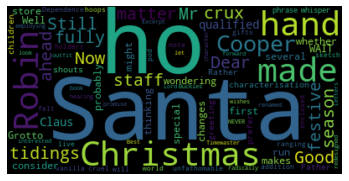

In [82]:
word_cloud = WordCloud().generate(email_body)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [83]:
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpus)
type(example_corpus)

nltk.corpus.reader.util.StreamBackedCorpusView

In [84]:
word_list = [''.join(word) for word in example_corpus]
novel_as_string = ''.join(word_list)

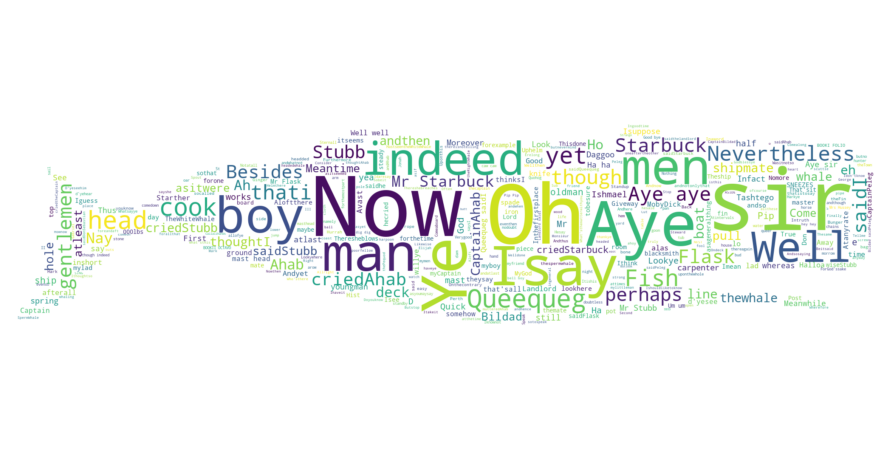

In [85]:
icon = Image.open(WHALE_FILE) # adding the image here
image_mask = Image.new(mode='RGB', size = icon.size, color = (255,255,255)) # adding the color in a picture 
image_mask.paste(icon,box = icon) # paste the word in the image
rgb_array = np.array(image_mask) # converting the text in array 

word_cloud = WordCloud(mask = rgb_array,background_color='white',max_words=400)  # adding the images here
word_cloud.generate(novel_as_string) # adding the images here

plt.figure(figsize=[16,8])
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [86]:
# Challenge: use the skull image in the lesson resources to create a word cloud
# for Shakespeare's play Hamlet

In [87]:
example_hamlet = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')

In [88]:
word_list = [''.join(word) for word in example_hamlet]
novel_as_string = ''.join(word_list)

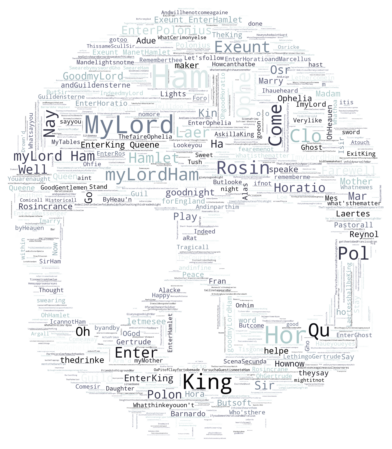

In [89]:
icon = Image.open(SKULL_FILE) # adding the image here
image_mask = Image.new(mode='RGB', size = icon.size, color = (255,255,255)) # adding the color in a picture 
image_mask.paste(icon,box = icon) # paste the word in the image
rgb_array = np.array(image_mask) # converting the text in array 

word_cloud = WordCloud(mask = rgb_array,background_color='white', 
                       colormap='bone',max_words=1000)  # adding the images here
word_cloud.generate(novel_as_string) # adding the images here

plt.figure(figsize=[16,8])
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# word cloud of Ham and Spam Message

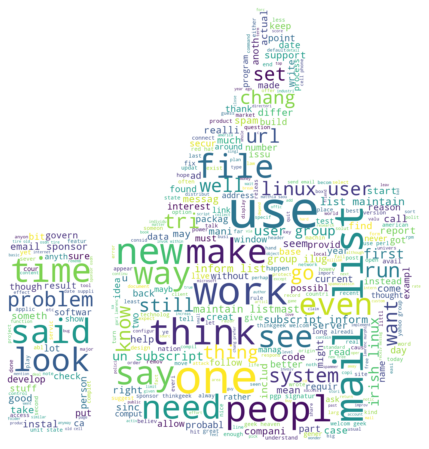

In [90]:
icon = Image.open(THUMBS_UP_FILE) # adding the image here
image_mask = Image.new(mode='RGB', size = icon.size, color = (255,255,255)) # adding the color in a picture 
image_mask.paste(icon,box = icon) # paste the word in the image
rgb_array = np.array(image_mask) # converting the text in array 

# Generate the text as a string from the word cloud
ham_str = ' '.join(flat_list_ham)

word_cloud = WordCloud(mask = rgb_array,background_color='white',max_words=400)  # adding the images here
word_cloud.generate(ham_str) # adding the images here

plt.figure(figsize=[16,8])
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [91]:
# Challenge: Look at the word cloud documentation. Use the custom font included in the 
# lesson resources instead of the default font and create a word cloud of the spammy words

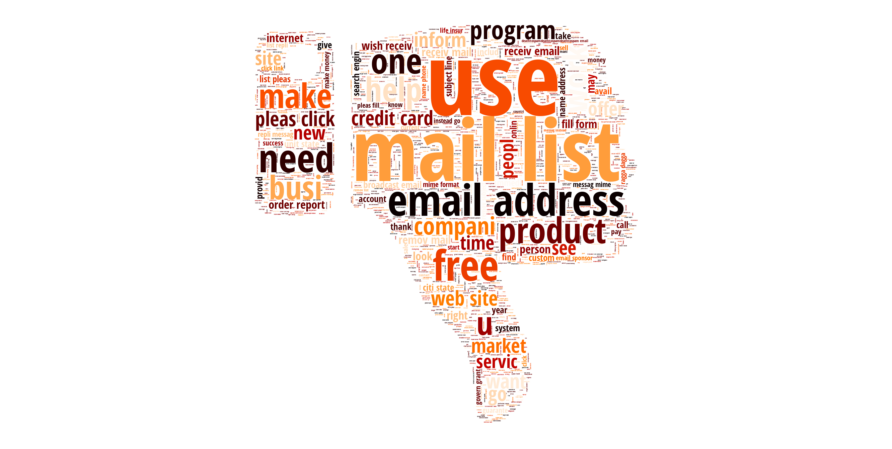

In [92]:
icon = Image.open(THUMBS_DOWN_FILE) # adding the image here
image_mask = Image.new(mode='RGB', size = icon.size, color = (255,255,255)) # adding the color in a picture 
image_mask.paste(icon,box = icon) # paste the word in the image
rgb_array = np.array(image_mask) # converting the text in array 

# Generate the text as a string from the word cloud
spam_str = ' '.join(flat_list_spam)

word_cloud = WordCloud(mask = rgb_array,background_color='white',max_words=2000, font_path = CUSTOM_FONT_FILE
                      , max_font_size = 300, colormap = 'gist_heat')  # adding the images here
word_cloud.generate(spam_str) # adding the images here

plt.figure(figsize=[16,8])
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Generate Vocabulary and Dicitionary

In [93]:
stemmed_nested_list = data.MESSAGE.apply(clean_msg_no_html)

#  flat_stemmed_nested_list = [item for sublist in stemmed_nested_list for item in sublist]

flat_stemmed_nested_list = []

for sublist in stemmed_nested_list:
    for item in sublist:
        flat_stemmed_nested_list.append(item)



C:\Users\97798\anaconda3\lib\site-packages\bs4\__init__.py:414: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [94]:
unique_words = pd.Series(flat_stemmed_nested_list).value_counts()
print('Nr of unique words is', unique_words.shape[0])

Nr of unique words is 27334


In [95]:
unique_words.head()

http     10660
use       5019
list      4851
email     4367
get       4200
dtype: int64

In [96]:
# Challenge: Create subset of the series called 'frequent_words' that only contains
# the most common 2,500 words out of the total. Print out the top 10 words

In [97]:
frequent_word = unique_words[0:VOCAB_SIZE]
print(' Most Common Words : \n ', frequent_word[0:10])

 Most Common Words : 
  http     10660
use       5019
list      4851
email     4367
get       4200
mail      3983
one       3907
free      3202
time      3042
work      2883
dtype: int64


In [98]:
type(filtered_words)

list

## Create Vocabulary DataFrame with a Word_Id

In [99]:
word_ids = list(range(0,VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD' : frequent_word.index.values},index = word_ids)
vocab.index.name = 'Word_Id'

In [100]:
vocab.head()

,VOCAB_WORD
Word_Id,
0,http
1,use
2,list
3,email
4,get


## save the vocabulary as a CSV File

In [101]:
vocab.to_csv(WORD_ID_FILE, index_label = vocab.index.name, header = vocab.VOCAB_WORD.name)

# Exercise: Checking if a Word is Part of the Vocabulary

In [102]:
# Challenge: Write a line of code that checks if a particular word is part 
# of the vocabulary. Your code should return True if the word is among the 
# 2,500 words that comprise the vocabulary, and False otherwise. Check these words:
# 'machine'
# 'learning'
# 'fun'
# 'learn'
# 'data'
# 'science'
# 'app'
# 'brewery'

In [103]:
any(vocab.VOCAB_WORD == 'machine') # ali ramro vayena yo

False

In [104]:
'machine' in set(vocab.VOCAB_WORD) # Ramro way ma searh garne tareka

False

# Exercise: Find the Email with the Most Number of Words

In [105]:
# Challenge: Print out the number of words in the longest email (after cleaning & stemming).
# Note the longest email's position in the list of cleaned emails. Print out the stemmed
# list of words in the longest email. Print out the longest email from the data dataframe.

# Hint: use the len() function and practice list comprehension

In [106]:
clean_email_length = []

for sublist in stemmed_nested_list:
    clean_email_length.append(len(sublist))

In [107]:
print(clean_email_length)

[92, 56, 44, 206, 45, 161, 47, 162, 203, 44, 55, 23, 44, 74, 64, 235, 47, 208, 36, 56, 223, 192, 0, 93, 14, 208, 44, 18, 64, 95, 312, 56, 141, 72, 55, 1066, 48, 139, 2, 90, 78, 4, 47, 70, 44, 75, 38, 12, 38, 63, 47, 51, 71, 80, 25, 275, 36, 63, 19, 18, 14, 40, 57, 18, 77, 28, 102, 41, 226, 68, 120, 5, 52, 0, 40, 40, 208, 0, 40, 146, 62, 114, 64, 253, 1221, 49, 0, 65, 52, 145, 15, 0, 90, 70, 2, 198, 50, 50, 50, 214, 119, 43, 80, 44, 319, 243, 9, 36, 98, 26, 52, 333, 47, 42, 0, 38, 78, 97, 79, 55, 102, 34, 70, 55, 18, 129, 50, 0, 39, 74, 43, 72, 47, 80, 0, 28, 223, 97, 0, 58, 84, 214, 75, 47, 18, 104, 20, 114, 110, 187, 6, 40, 54, 79, 276, 110, 208, 6, 489, 62, 17, 175, 79, 47, 74, 82, 255, 33, 218, 38, 36, 110, 93, 61, 55, 41, 108, 80, 84, 0, 52, 1390, 108, 97, 25, 185, 1, 119, 255, 28, 137, 195, 177, 0, 98, 109, 1465, 0, 108, 150, 113, 38, 153, 38, 42, 0, 0, 383, 188, 77, 330, 14, 92, 92, 104, 372, 187, 241, 143, 254, 14, 98, 135, 223, 65, 90, 226, 217, 129, 38, 94, 204, 255, 215, 146,

In [108]:
# python list compreherision (this is another way of doing )
clean_email_lengths = [ len(sublist) for sublist in stemmed_nested_list ]

In [109]:
print('Nr of words in the longest emil : ', max(clean_email_lengths))

Nr of words in the longest emil :  7671


In [110]:
print('email position in the list (and the dataframe)',np.argmax(clean_email_lengths))

email position in the list (and the dataframe) 5775


In [111]:
stemmed_nested_list[np.argmax(clean_email_lengths)]

['yahoo',
 'group',
 'sponsor',
 'dvd',
 'free',
 'p',
 'join',
 'http',
 'new',
 'version',
 'unison',
 'avail',
 'test',
 'incorpor',
 'sever',
 'small',
 'improv',
 'main',
 'chang',
 'fix',
 'bug',
 'potenti',
 'seriou',
 'safeti',
 'consequ',
 'small',
 'number',
 'user',
 'habit',
 'run',
 'one',
 'instanc',
 'unison',
 'time',
 'parallel',
 'user',
 'strongli',
 'encourag',
 'upgrad',
 'other',
 'wait',
 'wish',
 'releas',
 'includ',
 'execut',
 'linux',
 'solari',
 'window',
 'look',
 'maintain',
 'moment',
 'none',
 'activ',
 'develop',
 'regularli',
 'use',
 'unison',
 'window',
 'machin',
 'configur',
 'properli',
 'build',
 'execut',
 'export',
 'grab',
 'http',
 'enjoy',
 'benjamin',
 'chang',
 'sinc',
 'ad',
 'prefer',
 'maxthread',
 'use',
 'limit',
 'number',
 'simultan',
 'file',
 'transfer',
 'ad',
 'backupdir',
 'prefer',
 'control',
 'backup',
 'file',
 'store',
 'basic',
 'support',
 'ad',
 'osx',
 'particular',
 'unison',
 'recogn',
 'one',
 'host',
 'synchron',
 

In [112]:
data.at[np.argmax(clean_email_lengths),'MESSAGE']

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

# Generate Features & a Sparse Matrix

### Creating a DataFrame with one Word per Column

In [115]:
type(stemmed_nested_list)

pandas.core.series.Series

In [116]:
type(stemmed_nested_list.tolist())

list

In [119]:
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())

In [120]:
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
0,save,life,insur,spend,life,quot,save,g,famili,financi,...,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,...,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,...,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,...,None,None,None,None,None,None,None,None,None,None


In [121]:
word_columns_df.shape

(5796, 7671)

In [122]:
# Challenge: Can you split the data into a training and testing set? Set the test size at 30%. 
# The training data should include 4057 emails. Use a seed value of 42 to shuffle the data. 
# What should the target values be? 

In [134]:
x_train,x_test,y_train,y_test = train_test_split(word_columns_df, data.CATEGORY, test_size = 0.3, random_state = 42)

In [135]:
print('Nr of training samples', y_train.shape[0])
print('Fraction of training set', x_train.shape[0] / word_columns_df.shape[0] )

Nr of training samples 4057
Fraction of training set 0.6999654934437544


In [136]:
x_train.index.name = y_train.index.name = ' DOC_ID'
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
DOC_ID,,,,,,,,,,,,,,,,,,,,,
4844,ye,inde,agent,directori,verita,cd,unix,subdirectori,file,call,...,None,None,None,None,None,None,None,None,None,None
4727,problem,come,tri,instal,harddissssk,like,alreadi,mount,http,yahoo,...,None,None,None,None,None,None,None,None,None,None
5022,origin,messag,date,mon,aug,chad,norwood,sven,cc,subject,...,None,None,None,None,None,None,None,None,None,None
3504,inlin,folk,sever,major,internet,outag,morn,across,major,provid,...,None,None,None,None,None,None,None,None,None,None
3921,url,http,date,bath,chronicl,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [137]:
y_train.head()

 DOC_ID
4844    0
4727    0
5022    0
3504    0
3921    0
Name: CATEGORY, dtype: int64

### Create a Sparse Matrix for the Training Data


In [147]:
word_index = pd.Index(vocab.VOCAB_WORD)
type(word_index[3])

str

In [148]:
word_index.get_loc('thu')

393

In [149]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns sparse matrix as dataframe.
    
    df: A dataframe with words in the columns with a document id as an index (X_train or X_test)
    indexed_words: index of words ordered by word id
    labels: category as a series (y_train or y_test)
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
    
    return pd.DataFrame(dict_list)

In [150]:
%%time
sparse_train_df = make_sparse_matrix(x_train, word_index, y_train)

Wall time: 4min 28s


In [151]:
sparse_train_df[:5]

,LABEL,DOC_ID,OCCURENCE,WORD_ID
0,0,4844,1,265
1,0,4844,1,1236
2,0,4844,1,503
3,0,4844,1,308
4,0,4844,1,254


In [152]:
sparse_train_df.shape

(429238, 4)

In [153]:
sparse_train_df[-5:]

,LABEL,DOC_ID,OCCURENCE,WORD_ID
429233,1,860,1,47
429234,1,860,1,1431
429235,1,860,1,26
429236,1,860,1,21
429237,1,860,1,126


### Combine Occurrences with the Pandas groupby() Method


In [154]:
train_grouped = sparse_train_df.groupby(['DOC_ID',"WORD_ID","LABEL"]).sum()
train_grouped.head()

OCCURENCE
DOC_ID WORD_ID LABEL           
0      2       1              1
       3       1              2
       4       1              1
       7       1              3
       11      1              1

In [155]:
vocab.at[0, 'VOCAB_WORD']

'http'

In [158]:
data.MESSAGE[0]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n\n<HTML><HEAD>\n\n<META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T=\n\nype>\n\n<META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD>\n\n<BODY><!-- Inserted by Calypso -->\n\n<TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r=\n\nules=3Dnone \n\nstyle=3D"COLOR: black; DISPLAY: none" width=3D"100%">\n\n  <TBODY>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TD></TR>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=\n\n --><FONT \n\ncolor=3D#000000 face=3DVERDANA,ARIAL,HELVETICA size=3D-2><BR></FONT></TD><=\n\n/TR></TABLE><!-- End Calypso --><FONT color=3D#ff0000 \n\nface=3D"Copperplate Gothic Bold" size=3D5 PTSIZE=3D"10">\n\n<CENTER>Save up to 70% on Life Insurance.</CENTER></FONT><FONT color=3D#ff=\n\n0000

In [159]:
train_grouped = train_grouped.reset_index()

In [160]:
train_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,0,2,1,1
1,0,3,1,2
2,0,4,1,1
3,0,7,1,3
4,0,11,1,1


In [161]:
train_grouped.tail()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
258352,5795,2029,0,1
258353,5795,2039,0,1
258354,5795,2269,0,1
258355,5795,2332,0,1
258356,5795,2360,0,1


In [165]:
vocab.at[1923, 'VOCAB_WORD']

'presum'

In [166]:
data.MESSAGE[5795]

"Hi there,\n\n\n\nNow this is probably of no use to you whatsoever, but...\n\n\n\nNot a deb-head, but I also have a problem regards NVidia. I've two machines,\n\npretty much the same hardware. \n\nathlon 1700XP's, both have NVidia cards, one Gforce3 Ti and a Gforce2MX,\n\nboth use the same driver module. \n\n\n\nBoth have same kernel version albeit it compiled for their particular\n\nhardware.\n\n\n\nOne works perfectly, the other fails to load. When I check with lsmod, I can\n\nsee the NVdriver is loaded, but not used ;--(\n\nThus when I startx, it bombs out. \n\n\n\nIU still have X with the default nv driver and crappy accelleration -->\n\n650fps with glxgears [should be over 2000fps]\n\nIts not a hardware issue with the cards as I swapped them over and get the\n\nsame symptoms. \n\n\n\nI reckon my mobo is cack, I've tried swapping slots around, reserving\n\nresources etc all to no avail. \n\nShould there be an interrupt for the nv card? I haven't checked the other\n\nbox yet.\n\n\n\

In [167]:
train_grouped.shape

(258357, 4)

### Save Training Data as .txt File

In [173]:
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt = '%d')
train_grouped.columns

Index(['DOC_ID', 'WORD_ID', 'LABEL', 'OCCURENCE'], dtype='object')

# Challenge

Can you create a sparse matrix for the test data. Group the occurrences of the same word in the same email. Then save the data as a .txt file. 

In [180]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670
4675,interest,alway,wonder,thing,bad,exampl,goto,languag,support,goto,...,None,None,None,None,None,None,None,None,None,None
4220,url,http,date,final,gdc,europ,review,confernec,session,ect,...,None,None,None,None,None,None,None,None,None,None
2484,stephen,william,mailto,swilliam,weaken,food,transact,argument,note,neighborhood,...,None,None,None,None,None,None,None,None,None,None
2418,el,mon,sep,bitbitch,wrote,eugen,mani,homo,friend,lover,...,None,None,None,None,None,None,None,None,None,None
5110,music,school,joke,american,conductor,european,conductor,talk,european,conductor,...,None,None,None,None,None,None,None,None,None,None


In [181]:
y_test.head()

Doc_ID
4675    0
4220    0
2484    0
2418    0
5110    0
Name: CATEGORY, dtype: int64

In [183]:
x_test.shape

(1739, 7671)

In [185]:
%%time
sparse_test_df = make_sparse_matrix(x_test, word_index, y_test)

Wall time: 1min 24s


In [186]:
sparse_test_df.shape

(203385, 4)

In [187]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,8,2,1,1
1,8,3,1,4
2,8,4,1,2
3,8,5,1,1
4,8,6,1,2


In [188]:
test_grouped.shape

(117777, 4)

In [189]:
np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%d')

# Pre-Processing Subtleties and Checking your Understanding

Challenge: We started with 5796 emails. We split it into 4057 emails for training and 1739 emails for testing.

How many individual emails were included in the testing .txt file? Count the number in the test_grouped DataFrame. After splitting and shuffling our data, how many emails were included in the X_test DataFrame? Is the number the same? If not, which emails were excluded and why? Compare the DOC_ID values to find out.

In [191]:
train_doc_ids = set(train_grouped.DOC_ID)
test_doc_ids = set(test_grouped.DOC_ID)

In [192]:
len(test_doc_ids)

1724

In [194]:
len(x_test)

1739

In [195]:
set(x_test.index.values) - test_doc_ids # Excluded emails after pre-processing

{134, 179, 240, 274, 298, 339, 439, 471, 670, 734, 765, 945, 1544, 1670, 1700}

In [196]:
data.MESSAGE[14]

'<HTML><HEAD><TITLE>Lowest Rate Services</TITLE>\n\n<META http-equiv=3DContent-Type content=3D"text/html; charset=3Dwindows-12=\n\n52">\n\n<META content=3D"MSHTML 5.50.4134.600" name=3DGENERATOR></HEAD>\n\n<BODY vLink=3D#c0c0c0 link=3D#c0c0c0 bgColor=3D#000033 leftMargin=3D0><FON=\n\nT \n\nface=3Darial,helvetica>\n\n<P>\n\n<CENTER>\n\n<TABLE width=3D600 border=3D0>\n\n  <TBODY>\n\n  <TR>\n\n    <TD align=3Dmiddle><B><FONT color=3D#999999 size=3D6>Conferencing Made=\n\n Easy</FONT><BR>\n\n<FONT color=3D#999999 size=3D5>Only <U>18 Cents</U> Per Minute!</B></FONT>=\n\n</TD></TR></TBODY></TABLE>\n\n<P><FONT color=3D#ff0000 size=3D5><B>(Including Long Distance!)</B></FONT>=\n\n \n\n<P>\n\n<TABLE width=3D350 border=3D0>\n\n  <TBODY>\n\n  <TR>\n\n    <TD><FONT color=3D#999999 size=3D3><B>\n\n      <LI>No setup fees \n\n      <LI>No contracts or monthly fees \n\n      <LI>Call anytime, from anywhere, to anywhere \n\n      <LI>Connects up to 100 Participants \n\n      <LI>Simplicity in set up a

In [197]:
data.loc[14]

CATEGORY                                                     1
MESSAGE      <HTML><HEAD><TITLE>Lowest Rate Services</TITLE...
File_Name               00015.048434ab64c86cf890eda1326a5643f5
Name: 14, dtype: object

In [198]:
clean_msg_no_html(data.at[14, 'MESSAGE'])

['lowest',
 'rate',
 'servic',
 'conferenc',
 'easi',
 'cent',
 'per',
 'minut',
 'includ',
 'long',
 'distanc',
 'setup',
 'fee',
 'contract',
 'monthli',
 'fee',
 'call',
 'anytim',
 'anywher',
 'anywher',
 'connect',
 'particip',
 'simplic',
 'set',
 'administr',
 'oper',
 'help',
 'avail',
 'highest',
 'qualiti',
 'servic',
 'lowest',
 'rate',
 'industri',
 'fill',
 'form',
 'low',
 'find',
 'lower',
 'phone',
 'bill',
 'everi',
 'requir',
 'input',
 'field',
 'name',
 'web',
 'address',
 'compani',
 'name',
 'state',
 'busi',
 'phone',
 'home',
 'phone',
 'email',
 'address',
 'type',
 'busi',
 'remov',
 'distribut',
 'list',
 'pleas',
 'click']

In [199]:
data.MESSAGE[1096]

'Dear fellow eBay user,\n\n\n\nI listed this CD on eBay a few months ago and here\'s \n\nwhat happened.  I got an email from Safeharbor saying \n\nthat all my auctions had been cancelled and that the CD \n\nwas permanently "banned" from being sold on eBay.  From \n\nthen on, I called it the "Banned CD"!\n\n\n\nSo why did eBay ban it?  Maybe they figured you shouldn\'t \n\nhave access to this type of information, or maybe they \n\ndidn\'t think we could cram all of these programs onto \n\none CD Rom.  I\'ll let you decide.\n\n\n\nThis CD will teach you things that eBay, Uncle Sam, and \n\nothers just don\'t want you to know.  I am not responsible \n\nfor how you use some of this information and it is \n\nprovided for educational purposes only.  Here are just a \n\nfew of the things you will learn ...\n\n\n\n*** Find confidential info on anyone in 30 minutes or \n\nless on the Internet.  \n\n\n\n    You\'ll be able to track down your old flame, find \n\n    out how much money your ex is 

In [200]:
clean_msg_no_html(data.at[1096, 'MESSAGE'])

['dear',
 'fellow',
 'ebay',
 'user',
 'list',
 'cd',
 'ebay',
 'month',
 'ago',
 'happen',
 'got',
 'email',
 'safeharbor',
 'say',
 'auction',
 'cancel',
 'cd',
 'perman',
 'ban',
 'sold',
 'ebay',
 'call',
 'ban',
 'cd',
 'ebay',
 'ban',
 'mayb',
 'figur',
 'access',
 'type',
 'inform',
 'mayb',
 'think',
 'could',
 'cram',
 'program',
 'onto',
 'one',
 'cd',
 'rom',
 'let',
 'decid',
 'cd',
 'teach',
 'thing',
 'ebay',
 'uncl',
 'sam',
 'other',
 'want',
 'know',
 'respons',
 'use',
 'inform',
 'provid',
 'educ',
 'purpos',
 'thing',
 'learn',
 'find',
 'confidenti',
 'info',
 'anyon',
 'minut',
 'less',
 'internet',
 'abl',
 'track',
 'old',
 'flame',
 'find',
 'much',
 'money',
 'ex',
 'hide',
 'bank',
 'account',
 'run',
 'background',
 'check',
 'proespect',
 'client',
 'employe',
 'even',
 'govern',
 'agenc',
 'troubl',
 'obtain',
 'much',
 'inform',
 'resourc',
 'profession',
 'investig',
 'right',
 'fingertip',
 'home',
 'comput',
 'list',
 'compani',
 'issu',
 'colleg',
 'd

In [201]:
clean_message(data.at[1096, 'MESSAGE'])

['dear',
 'fellow',
 'ebay',
 'user',
 'list',
 'cd',
 'ebay',
 'month',
 'ago',
 'happen',
 'got',
 'email',
 'safeharbor',
 'say',
 'auction',
 'cancel',
 'cd',
 'perman',
 'ban',
 'sold',
 'ebay',
 'call',
 'ban',
 'cd',
 'ebay',
 'ban',
 'mayb',
 'figur',
 'access',
 'type',
 'inform',
 'mayb',
 'think',
 'could',
 'cram',
 'program',
 'onto',
 'one',
 'cd',
 'rom',
 'let',
 'decid',
 'cd',
 'teach',
 'thing',
 'ebay',
 'uncl',
 'sam',
 'other',
 'want',
 'know',
 'respons',
 'use',
 'inform',
 'provid',
 'educ',
 'purpos',
 'thing',
 'learn',
 'find',
 'confidenti',
 'info',
 'anyon',
 'minut',
 'less',
 'internet',
 'abl',
 'track',
 'old',
 'flame',
 'find',
 'much',
 'money',
 'ex',
 'hide',
 'bank',
 'account',
 'run',
 'background',
 'check',
 'proespect',
 'client',
 'employe',
 'even',
 'govern',
 'agenc',
 'troubl',
 'obtain',
 'much',
 'inform',
 'resourc',
 'profession',
 'investig',
 'right',
 'fingertip',
 'home',
 'comput',
 'list',
 'compani',
 'issu',
 'colleg',
 'd

In [202]:
'The End'

'The End'